In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def vel_collision(vel1, vel2, mass1, mass2):
    cm = (mass1*vel1 + mass2*vel2)/(mass1+mass2)
    cr = vel1 - vel2
    cr_mag = np.linalg.norm(cr, axis=1)
    N = vel1.shape[0]
    # cos_chi = 2*np.random.rand(N)-1
    cos_chi = np.random.rand(N)*0.2 + 0.25
    sin_chi = np.sqrt(1-cos_chi*cos_chi)*np.random.choice([-1, 1], size=N)
    eps = np.random.rand(N)*np.pi*2
    cr[:,0] = cr_mag*cos_chi
    cr[:,1] = cr_mag*sin_chi*np.cos(eps)
    cr[:,2] = cr_mag*sin_chi*np.sin(eps)
    Newvel1 = cm + mass2/(mass1+mass2)*cr
    Newvel2 = cm - mass1/(mass1+mass2)*cr
    return Newvel1, Newvel2

In [25]:
DXsec = np.load('./DXsec_Al.npy')
def DCS_pdf(energy):
    randChoice = np.random.randint(int(1e6), size=(energy.shape[0]))
    chi = DXsec[randChoice]
    return chi

In [30]:
def vel_collision_chipdf(vel1, vel2, mass1, mass2):
    cm = (mass1*vel1 + mass2*vel2)/(mass1+mass2)
    cr = vel1 - vel2
    cr_mag = np.linalg.norm(cr, axis=1)
    energy = 0.5*cr_mag**2
    N = vel1.shape[0]
    chi = DCS_pdf(energy)
    cos_chi = np.cos(chi)
    sin_chi = np.sin(chi)
    eps = np.random.rand(N)*np.pi*2
    cr[:,0] = cr_mag*cos_chi*np.random.choice([-1, 1], size=N)
    cr[:,1] = cr_mag*sin_chi*np.cos(eps)
    cr[:,2] = cr_mag*sin_chi*np.sin(eps)
    Newvel1 = cm + mass2/(mass1+mass2)*cr
    Newvel2 = cm - mass1/(mass1+mass2)*cr
    return Newvel1, Newvel2

In [8]:
T = 2000
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al

def velocity_dist(Ero_dist_x, filmMac1, filmMac2):
    N = Ero_dist_x.shape[0]
    Random1 = np.random.rand(N)
    Random2 = np.random.rand(N)
    Random3 = np.random.rand(N)
    velosity_matrix = np.array([max_velocity_u(Random1, Random2), max_velocity_w(Random1, Random2), max_velocity_v(Random3)]).T
    velosity_norm = np.linalg.norm(velosity_matrix, axis=1)
    vel_theta = filmMac1/180*np.pi
    vel_phi = filmMac2/180*np.pi

    vel_x = velosity_norm*np.sin(vel_theta)*np.cos(vel_phi)
    vel_y = velosity_norm*np.sin(vel_theta)*np.sin(vel_phi)*np.random.choice([-1,1], vel_phi.shape[0])
    vel_z = velosity_norm*np.cos(vel_theta)
    velosity_matrix_2 = np.array([vel_x, vel_y, -vel_z]).T

    return velosity_matrix_2


def max_velocity_u(random1, random2):
    return Cm*np.sqrt(-np.log(random1))*(np.cos(2*np.pi*random2))

def max_velocity_w(random1, random2):
    return Cm*np.sqrt(-np.log(random1))*(np.sin(2*np.pi*random2))

def max_velocity_v(random3):
    return -Cm*np.sqrt(-np.log(random3))

In [27]:
N = 1000000

v1 = np.zeros((N,3))
v1[:,0] = np.random.rand(N) - 0.5
v1[:,1] = np.random.rand(N) - 0.5
v1[:,2] = np.random.rand(N) - 0.5
# v1 = np.zeros((N,3))


Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)

velosity_matrix = np.array([max_velocity_u(Random1, Random2), max_velocity_w(Random1, Random2), max_velocity_v(Random3)]).T

print(velosity_matrix.shape)
velosity_norm = np.linalg.norm(velosity_matrix, axis=1)
print(velosity_norm.shape)

v2 = np.zeros((N,3))
# chi = 
cos_chi = 2*np.random.rand(N)-1
sin_chi = np.sqrt(1-cos_chi*cos_chi)*np.random.choice([-1, 1], size=N)
eps = np.random.rand(N)*np.pi*2

v2[:,0] = sin_chi*np.sin(eps) * velosity_norm
v2[:,1] = sin_chi*np.cos(eps) * velosity_norm
v2[:,2] = cos_chi * velosity_norm
# v1[:,0] = 1
# v1[:,1] = 1e-17
# v1[:,2] = -1
# mu, sigma = 0, 0.1 # mean and standard deviation
# cos_chi = np.random.normal(mu, sigma, N)

# # cos_chi = np.random.rand(N)*0.5
# sin_chi = np.sqrt(1-cos_chi**2)*np.random.choice([-1, 1], size=N)
# # chi = np.ones(N)*np.pi
# phi = np.random.rand(N)*np.pi*2
 
# test = vel_collision(v1, v2, cos_chi,sin_chi, phi)

(1000000, 3)
(1000000,)


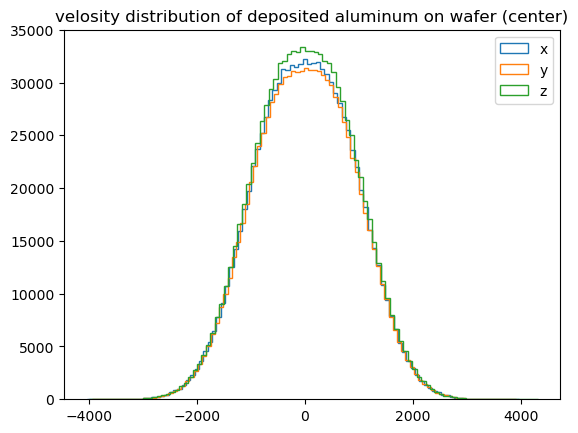

In [89]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(v2[:,0], bins=100,histtype='step', stacked=True, fill=False, label='x')
ax.hist(v2[:,1], bins=100,histtype='step', stacked=True, fill=False, label='y')
ax.hist(v2[:,2], bins=100,histtype='step', stacked=True, fill=False, label='z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [46]:
test = vel_collision(v1, v2,1, 2)
test2 = vel_collision_chipdf(v1, v2,1, 2)

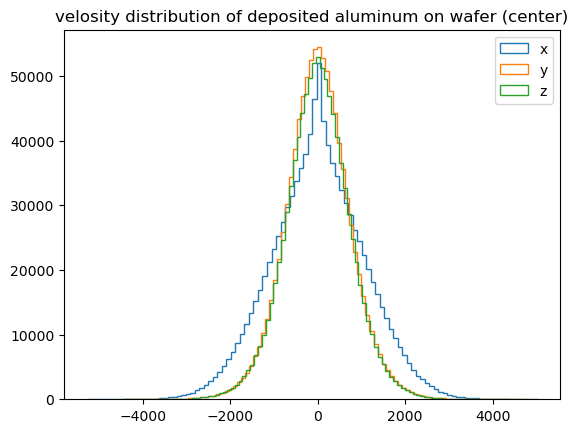

In [35]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(test2[0][:,0], bins=100,histtype='step', stacked=True, fill=False, label='x')
ax.hist(test2[0][:,1], bins=100,histtype='step', stacked=True, fill=False, label='y')
ax.hist(test2[0][:,2], bins=100,histtype='step', stacked=True, fill=False, label='z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

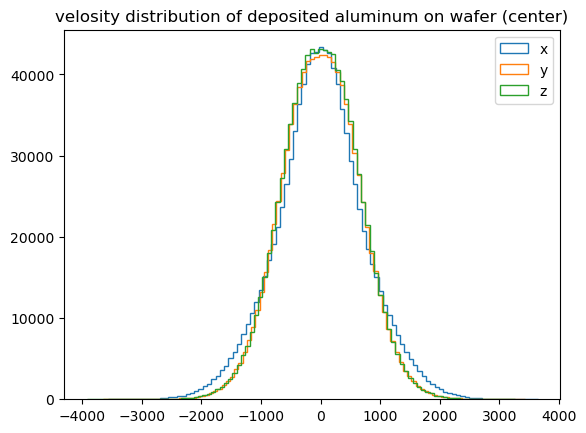

In [36]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(test2[1][:,0], bins=100,histtype='step', stacked=True, fill=False, label='x')
ax.hist(test2[1][:,1], bins=100,histtype='step', stacked=True, fill=False, label='y')
ax.hist(test2[1][:,2], bins=100,histtype='step', stacked=True, fill=False, label='z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

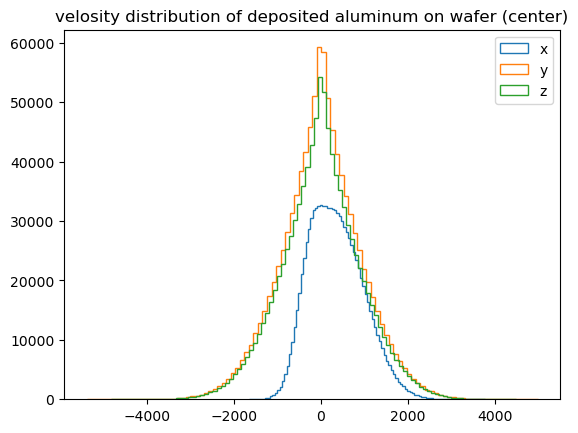

In [47]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(test[0][:,0], bins=100,histtype='step', stacked=True, fill=False, label='x')
ax.hist(test[0][:,1], bins=100,histtype='step', stacked=True, fill=False, label='y')
ax.hist(test[0][:,2], bins=100,histtype='step', stacked=True, fill=False, label='z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

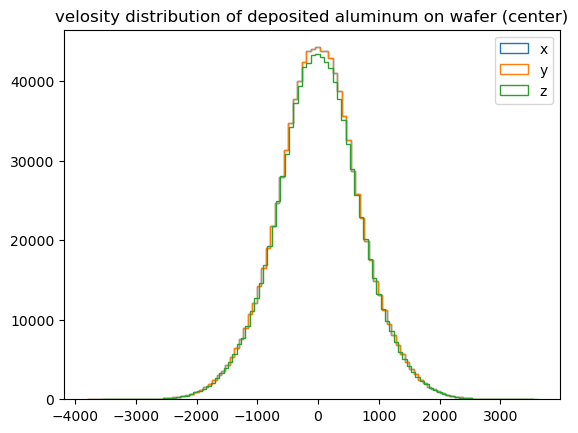

In [48]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(test[1][:,1], bins=100,histtype='step', stacked=True, fill=False, label='x')
ax.hist(test[1][:,1], bins=100,histtype='step', stacked=True, fill=False, label='y')
ax.hist(test[1][:,2], bins=100,histtype='step', stacked=True, fill=False, label='z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [49]:
from scipy.spatial.transform import Rotation as R

In [ ]:
A = np.array([0, 1, 2])


B = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])

B = np.arange(9).reshape((3,3))

print(B)
print(np.einsum('ij,j->i', B, A))
print(B*A)

In [86]:
def rotate_matrix(phi, theta):
    phi_array = np.expand_dims(phi, axis=(0, 1))
    theta_array = np.expand_dims(theta, axis=(0, 1))
    cos_phi = np.cos(phi_array)
    sin_phi = np.sin(phi_array)
    cos_theta = np.cos(theta_array)
    sin_theta = np.sin(theta_array)
    matrix_i = np.concatenate((cos_theta*cos_phi, cos_theta*sin_phi, -sin_theta), axis=1)
    matrix_j = np.concatenate((matrix_i, np.concatenate((-sin_phi, cos_phi, np.zeros_like(phi_array)), axis=1)), axis=0)
    matrix = np.concatenate((matrix_j, np.concatenate((sin_theta*cos_phi, sin_theta*sin_phi, cos_theta), axis=1)), axis=0)

    return matrix.T

In [87]:
N = 10

vtest = np.random.rand(N, 3)
print(vtest)

z = np.random.rand(N)*np.pi*2
y = np.random.rand(N)*np.pi*2
# y = 0

rz = R.from_matrix(rotate_matrix(z, y))

vtest_rotate = rz.apply(vtest)
# print(vtest_rotate)

vtest_return = rz.apply(vtest_rotate, inverse=True)

# print(vtest_return)

print(np.allclose(vtest, vtest_return))

[[0.95140997 0.82200116 0.17436473]
 [0.79820382 0.66302956 0.97409067]
 [0.5937844  0.90298108 0.72610235]
 [0.25603018 0.31519188 0.78471066]
 [0.10484056 0.36807534 0.83204422]
 [0.43884473 0.6336166  0.64715439]
 [0.60263618 0.32470327 0.67782935]
 [0.53290644 0.22330166 0.50839647]
 [0.70998167 0.6798975  0.02440237]
 [0.11468135 0.0242426  0.84247439]]
True


In [85]:
N = 10

vtest = np.random.rand(3)
print(vtest)

z = np.random.rand()*np.pi*2
y = np.random.rand()*np.pi*2
# y = 0

rz = R.from_matrix([[np.cos(z)*np.cos(y), -np.sin(z), np.cos(z)*np.sin(y)],
                    [np.sin(z)*np.cos(y),  np.cos(z), np.sin(z)*np.sin(y)],
                    [np.sin(y),                    0,           np.cos(y)]])

vtest_rotate = rz.apply(vtest)
print(vtest_rotate)

zR = -z
yR = -y
# rzR = R.from_matrix([[np.cos(zR), -np.sin(zR), 0],
#                     [np.sin(zR), np.cos(zR), 0],
#                     [0, 0, 1]])

rzR = R.from_matrix([[np.cos(zR)*np.cos(yR), -np.sin(zR), np.cos(zR)*np.sin(yR)],
                    [np.sin(zR)*np.cos(yR),  np.cos(zR), np.sin(zR)*np.sin(yR)],
                    [np.sin(yR),                    0,           np.cos(yR)]])

vtest_return = rz.apply(vtest_rotate, inverse=True)

print(vtest_return)

print(np.allclose(vtest, vtest_return))

[0.20347954 0.35938419 0.07631746]
[ 0.1257012   0.21463349 -0.33840353]
[0.20347954 0.35938419 0.07631746]
True


In [76]:
vtest = np.random.rand(3)
print(vtest)

z = np.random.rand()*np.pi*2
y = np.random.rand()*np.pi*2
# y = 0

rz = R.from_matrix([[np.cos(z), -np.sin(z), 0],
                    [np.sin(z),  np.cos(z), 0],
                    [0,          0,         1]])

ry = R.from_matrix([[np.cos(y),          0, np.sin(y)],
                    [0,          np.cos(z),        0],
                    [-np.sin(y),    0,     np.cos(y)]])

vtest_rotatez = rz.apply(vtest)
vtest_rotatezy = ry.apply(vtest_rotatez)

print(vtest_rotatezy)

zR = -z
yR = -y
# rzR = R.from_matrix([[np.cos(zR), -np.sin(zR), 0],
#                     [np.sin(zR), np.cos(zR), 0],
#                     [0, 0, 1]])

rzR = R.from_matrix([[np.cos(zR), -np.sin(zR), 0],
                    [np.sin(zR),  np.cos(zR), 0],
                    [0,          0,         1]])

ryR = R.from_matrix([[np.cos(yR),          0, np.sin(yR)],
                    [0,          np.cos(zR),        0],
                    [-np.sin(yR),    0,     np.cos(yR)]])

vtest_returnz = ryR.apply(vtest_rotatezy)
vtest_return = rzR.apply(vtest_returnz)

print(vtest_return)

print(np.allclose(vtest, vtest_return))

[0.23945329 0.749014   0.95428753]
[-1.14402545 -0.23139861  0.40827072]
[0.23945329 0.749014   0.95428753]
True


In [130]:
def newVel_gpu_ch4(v, vMag, cos_chi, sin_chi, eps):

    theta0 = np.arccos(v[:, 2]/vMag) #y
    phi0= np.arctan2(v[:, 1], v[:, 0]) #z
    # phi0 = np.arccos(v[:, 2]/vMag) #y
    # theta0= np.arctan(v[:, 0]/v[:, 1]) #z
    # chi = np.arccos(1-2*r/(1+8*(energy/27.21)*(1-r)))
    # phi = 2*np.pi*np.random.rand()
    m1m2= R.from_matrix(rotate_matrix(phi0, theta0))
    vRotate = m1m2.apply(v)
    
    # rotateAngle = np.array([cos_chi, sin_chi*np.cos(eps), sin_chi*np.sin(eps)])
    # print(rotateAngle.shape)
    scatter = R.from_rotvec(rotateAngle.T)
    scatterRotate = scatter.apply(vRotate)
    # scatterRotate = np.einsum('...i,j...->...i', vRotate, rotateAngle)
    vRotate_inverse = m1m2.apply(scatterRotate, inverse=True)
    newVel = vRotate_inverse
    return newVel, scatterRotate, vRotate

In [135]:
def newVel_gpu_ch3(v, vMag, chi, eps):

    theta0 = np.arccos(v[:, 2]/vMag) #y
    phi0= np.arctan2(v[:, 1], v[:, 0]) #z
    # phi0 = np.arccos(v[:, 2]/vMag) #y
    # theta0= np.arctan(v[:, 0]/v[:, 1]) #z
    # chi = np.arccos(1-2*r/(1+8*(energy/27.21)*(1-r)))
    # phi = 2*np.pi*np.random.rand()
    m1m2= R.from_matrix(rotate_matrix(phi0, theta0))
    vRotate = m1m2.apply(v)
    
    # rotateAngle = np.array([cos_chi, sin_chi*np.cos(eps), sin_chi*np.sin(eps)])
    # print(rotateAngle.shape)
    scatter = R.from_rotvec(np.array([np.zeros(v.shape[0]), eps, chi]).T)
    scatterRotate = scatter.apply(vRotate)
    # scatterRotate = np.einsum('...i,j...->...i', vRotate, rotateAngle)
    vRotate_inverse = m1m2.apply(scatterRotate, inverse=True)
    newVel = vRotate_inverse
    return newVel, scatterRotate, vRotate

In [136]:
N = 1000000

vtest = np.zeros((N,3))
vtest[:,0] = np.random.rand(N) - 0.5
vtest[:,1] = np.random.rand(N) - 0.5
vtest[:,2] = np.random.rand(N) - 0.5
# vtest = np.zeros((N,3))
# vtest[:,0] = 1
# vtest[:,1] = 1e-17
# vtest[:,2] = -1
mu, sigma = 0, 0.1 # mean and standard deviation
chi = np.random.normal(mu, sigma, N)

# cos_chi = np.random.rand(N)*0.5
# sin_chi = np.sqrt(1-cos_chi**2)*np.random.choice([-1, 1], size=N)
# chi = np.ones(N)*np.pi
phi = np.random.rand(N)*np.pi*2
 
ttestsm = newVel_gpu_ch3(vtest, np.linalg.norm(vtest, axis=1), chi, phi)

In [131]:
N = 1000000

vtest = np.zeros((N,3))
vtest[:,0] = np.random.rand(N) - 0.5
vtest[:,1] = np.random.rand(N) - 0.5
vtest[:,2] = np.random.rand(N) - 0.5
# vtest = np.zeros((N,3))
# vtest[:,0] = 1
# vtest[:,1] = 1e-17
# vtest[:,2] = -1
mu, sigma = 0, 0.1 # mean and standard deviation
cos_chi = np.random.normal(mu, sigma, N)

# cos_chi = np.random.rand(N)*0.5
sin_chi = np.sqrt(1-cos_chi**2)*np.random.choice([-1, 1], size=N)
# chi = np.ones(N)*np.pi
phi = np.random.rand(N)*np.pi*2
 
ttestsm = newVel_gpu_ch3(vtest, np.linalg.norm(vtest, axis=1), cos_chi,sin_chi, phi)

(3, 1000000)


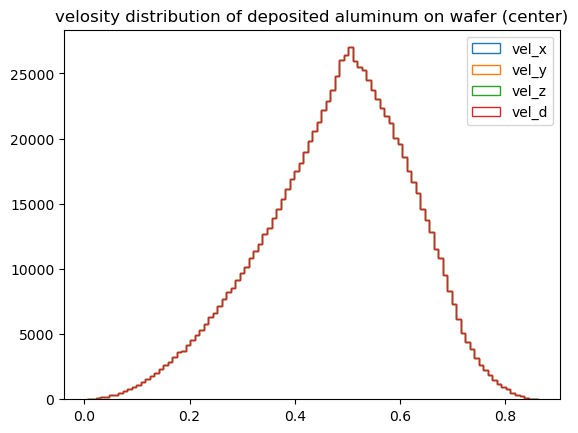

In [137]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(np.linalg.norm(vtest, axis=1), bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(np.linalg.norm(ttestsm[1], axis=1), bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(np.linalg.norm(ttestsm[0], axis=1), bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.hist(np.linalg.norm(ttestsm[2], axis=1), bins=100,histtype='step', stacked=True, fill=False, label='vel_d')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

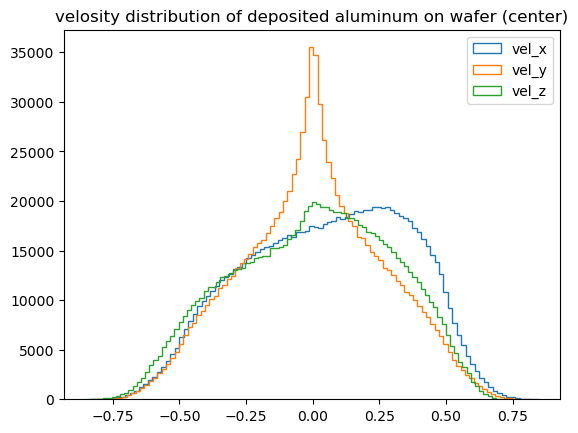

In [138]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(ttestsm[0][:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(ttestsm[0][:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(ttestsm[0][:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

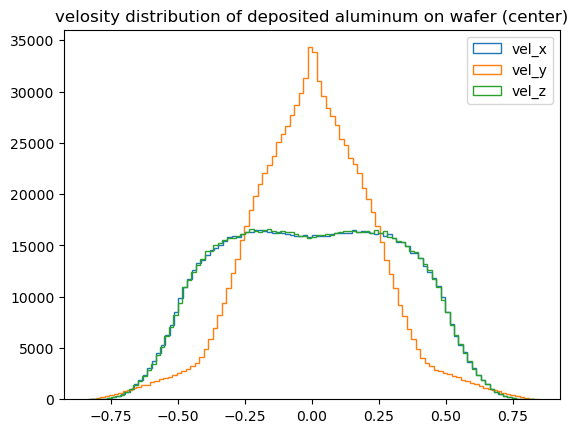

In [139]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(ttestsm[1][:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(ttestsm[1][:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(ttestsm[1][:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()